In [24]:
import warnings

warnings.filterwarnings("ignore")

from src import utils
from src.outcomes import plurality_outcome
from src.happiness_level import HappinessLevel
from src.strategic_voting_risk import StrategicVoting
import os
import numpy as np
import src.coalition_evaluator as coalition_evaluator
from matplotlib import pyplot as plt

In [78]:
path_voting = "input/voting_result.json"
if "env" in os.environ:
    if os.environ["env"] == "docker":
        path_voting = "/input/voting_result.json"

In [95]:
voting = utils.read_voting(path_voting, table_name="voting5")
print(set(voting[:, 0]))
voting_table = voting.to_pandas()
voting_table

{'C', 'B', 'A', 'D'}


,voter_0,voter_1,voter_2,voter_3,voter_4,voter_5
preference_0,C,B,C,C,B,A
preference_1,A,D,D,D,A,D
preference_2,D,C,A,A,D,B
preference_3,B,A,B,B,C,C


In [100]:
from importlib import reload
reload(coalition_evaluator)
successful_coalitions_plurality = coalition_evaluator.evaluate_coalition_strategic_voting_plurality(voting)

# successful_coalitions_for_two = coalition_evaluator.evaluate_coalition_strategic_voting_for_two(voting)
# successful_coalitions_veto = coalition_evaluator.evaluate_coalition_strategic_voting_veto(voting)
# successful_coalitions_borda = coalition_evaluator.evaluate_coalition_strategic_voting_borda(voting)
# print((successful_coalitions_plurality[0][6]))

# print(len(successful_coalitions_plurality[0]))


coalition_evaluator.print_results_coalition_strategic_voting_plurality(successful_coalitions_plurality)

# print((successful_coalitions_plurality[0][6]))
if len(successful_coalitions_plurality)>0:
    voting = successful_coalitions_plurality[0][6]
# print(voting)
# new_successful_coalitions_plurality = coalition_evaluator.evaluate_coalition_strategic_voting_plurality(new_voting)
# coalition_evaluator.print_results_coalition_strategic_voting_plurality(new_successful_coalitions_plurality)


# coalition_evaluator.print_results_coalition_strategic_voting_plurality(successful_coalitions_plurality)
# coalition_evaluator.print_results_coalition_strategic_voting_for_two(successful_coalitions_for_two)
# coalition_evaluator.print_results_coalition_strategic_voting_veto(successful_coalitions_veto)
# coalition_evaluator.print_results_coalition_strategic_voting_borda(successful_coalitions_borda)




Summary of Successful Coalitions under Plurality Voting:


IndexError: list index out of range

Analyzing Voting for Two...
Analyzing 2x2 matrix...
Analyzing 3x3 matrix...
Analyzing 4x4 matrix...
Analyzing 5x5 matrix...


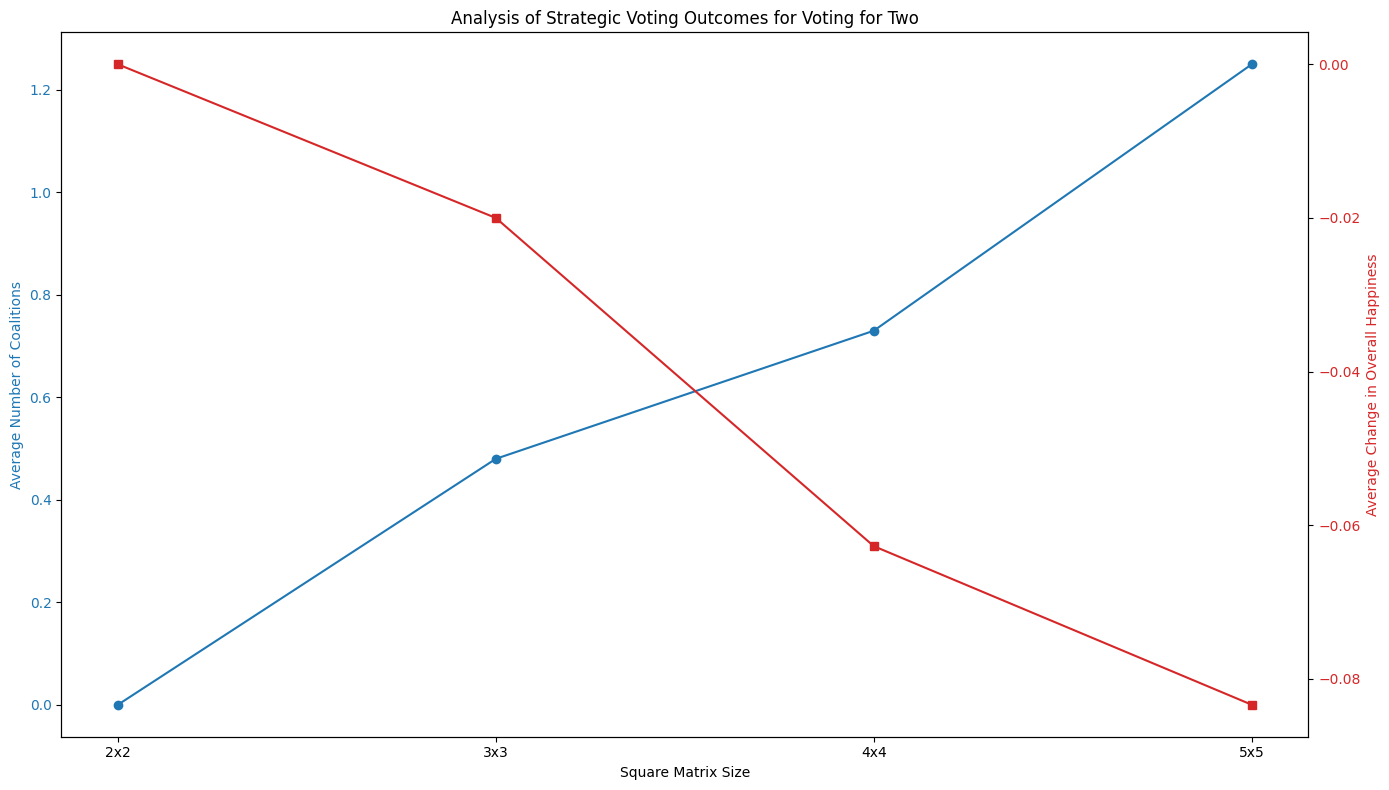

In [14]:
from importlib import reload
reload(coalition_evaluator)

voting_schemes = {
    # 'Plurality': coalition_evaluator.evaluate_coalition_strategic_voting_plurality,
    'Voting for Two': coalition_evaluator.evaluate_coalition_strategic_voting_for_two,
    # 'Veto': coalition_evaluator.evaluate_coalition_strategic_voting_veto,
    # 'Borda': coalition_evaluator.evaluate_coalition_strategic_voting_borda
}

num_trials = 100
square_matrix_sizes = range(2, 6)  # From 2x2 to 5x5 matrices

for scheme_name, scheme_function in voting_schemes.items():
    average_coalitions = []
    average_happiness_changes = []
    scenarios = []

    print(f'Analyzing {scheme_name}...')

    for size in square_matrix_sizes:
        print(f'Analyzing {size}x{size} matrix...')
        statistics = coalition_evaluator.analyze_coalitions(num_trials, [size], [size], scheme_name, scheme_function)
        
        average_coalitions.append(statistics['average_coalitions'][0])
        average_happiness_changes.append(statistics['average_overall_happiness_change'][0])
        scenarios.append(f'{size}x{size}')

    # Create subplots
    fig, ax1 = plt.subplots(figsize=(14, 8))

    # Plot for average number of coalitions
    ax1.set_xlabel('Square Matrix Size')
    ax1.set_ylabel('Average Number of Coalitions', color='tab:blue')
    ax1.plot(scenarios, average_coalitions, marker='o', color='tab:blue', label='Average Number of Coalitions')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Instantiate a second y-axis to plot average change in overall happiness
    ax2 = ax1.twinx()  
    ax2.set_ylabel('Average Change in Overall Happiness', color='tab:red')
    ax2.plot(scenarios, average_happiness_changes, marker='s', color='tab:red', label='Average Change in Overall Happiness')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    # Title and customizations
    plt.title(f'Analysis of Strategic Voting Outcomes for {scheme_name}')
    fig.tight_layout()
    plt.xticks(rotation=45, fontsize=10)
    plt.show()
